In [1]:
%matplotlib inline

In [2]:
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [3]:
cmap = plt.get_cmap("tab20")
# 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'

plt.rc('font', family='serif')
plt.rc('font', size=16)          # controls default text sizes
plt.rc('axes', titlesize='small')     # fontsize of the axes title
plt.rc('axes', labelsize= 'small')    # fontsize of the x and y labels
plt.rc('xtick', labelsize='x-small')    # fontsize of the tick labels
plt.rc('ytick', labelsize='x-small')    # fontsize of the tick labels
plt.rc('legend', fontsize='xx-small')    # legend fontsize
plt.rc('figure', titlesize='medium')  # fontsize of the figure title

In [4]:
NO_OF_NODES = 10

In [5]:
beno = np.load('../data/BENO_all_years.npy', allow_pickle=True)
deno = np.load('../data/DENO_all_years.npy', allow_pickle=True)
peno = np.load('../data/PENO_all_years.npy', allow_pickle=True)
seno = np.load('../data/SENO_all_years.npy', allow_pickle=True)
aeno = np.load('../data/AENO_all_years.npy', allow_pickle=True)

In [6]:
states_list = beno[:,0]
actions = np.array(beno[:,1])
rewards = np.array(beno[:,2])
for i in range(24,np.int(rewards.shape[0]),24):
    rewards[i-24:i] = rewards[i]

states = np.array([np.array(x) for x in states_list])

batt = states[:,0]
enp = states[:,1]
henergy = states[:,2]
fcast = states[:,3]

beno = np.column_stack((batt,enp,henergy,fcast,actions,rewards))

In [7]:
batt = beno[:,0]
beno_total_downtime = (batt < 0.00501).astype(int)
beno_total_overflow = (batt == 1).astype(int)


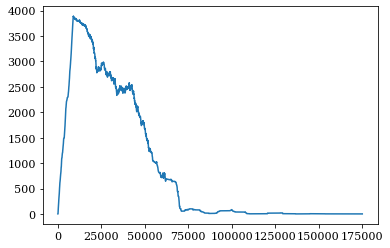

In [8]:
RANGE = 24*365 #1 year

VIEW = RANGE * 20 # 20 year
violation_density = beno_total_downtime.cumsum() + beno_total_overflow.cumsum()
violation_density[RANGE:] = violation_density[RANGE:] - violation_density[:-RANGE]
plt.plot(violation_density[0:VIEW])

In [9]:
np.where(violation_density[24*365*10:]<24)

(array([    0,     1,     2, ..., 87717, 87718, 87719]),)

In [10]:
(24*365*10+2586)

90186

In [11]:
cost_cum = beno_total_downtime.cumsum() + beno_total_overflow.cumsum()

In [12]:
cost_cum[(24*365*10+2586)]

17368

In [13]:
batt = seno[:,:,0]
downtime_occur = (batt < 0.00501).astype(int)
overflow_occur = (batt == 1).astype(int)

# OVERALL DOWNTIME OF SYSTEM
total_downtime = downtime_occur.sum(axis=0)
total_overflow = overflow_occur.sum(axis=0)

violations =total_downtime.sum()+total_overflow.sum()
print(violations)

# RANGE = 24*365 #1 year
# VIEW = RANGE * 20 # 20 year

# violation_density = total_downtime.cumsum() + total_overflow.cumsum()
# violation_density[RANGE:] = violation_density[RANGE:] - violation_density[:-RANGE]
# np.where(violation_density[24*7*26:]<24)
# plt.plot(violation_density[0:VIEW])

5725


In [14]:
violate = downtime_occur.sum(axis=0) + overflow_occur.sum(axis=0)
np.where(violate >= 1)

(array([  18,   19,   20,   21,   22,   23,   24,   25,   26,   27,   28,
          29,   30,   31,   32,   33,   34,   35,   36,   37,   38,   39,
          40,   41,   42,   43,   44,   45,   46,   47,   48,   49,   50,
          51,   52,   53,   54,   55,   56,   57,   58,   63,   64,   65,
          66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
          77,   78,   79,   80,   81,   82,   88,   89,   90,   91,   92,
          93,   94,   95,   96,   97,   98,   99,  100,  101,  102,  103,
         104,  105,  106,  107,  108,  109,  110,  111,  112,  113,  114,
         115,  116,  117,  118,  119,  120,  121,  122,  123,  124,  125,
         126,  127,  128,  129,  130,  131,  132,  133,  134,  135,  136,
         137,  138,  139,  140,  141,  142,  143,  144,  145,  146,  147,
         148,  149,  150,  151,  152,  153,  154,  155,  156,  157,  158,
         159,  160,  161,  162,  163,  164,  165,  166,  167,  168,  169,
         170,  171,  172,  173,  174, 

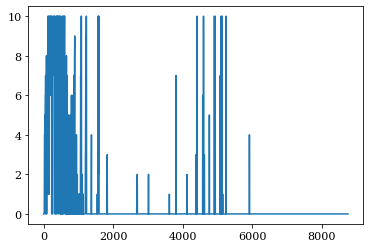

In [15]:
plt.plot(violate)

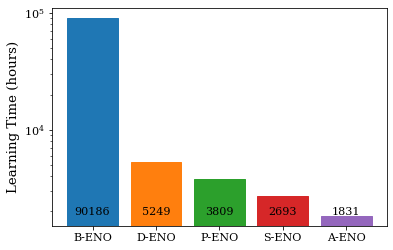

In [16]:
objects = ('B-ENO', 'D-ENO', 'P-ENO' , 'S-ENO', 'A-ENO')
y_pos = np.arange(len(objects))
performance = [90186,5249,3809,2693,1831]

barlist = plt.bar(y_pos, performance, align='center', alpha=1.0)
for i in range(len(objects)):
    barlist[i].set_color(cmap(2*i))
    
for bar in barlist:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.4, 2000, yval, fontsize='x-small',ha='center',va='center')

plt.xticks(y_pos, objects)
plt.yscale('log')
plt.ylabel('Learning Time (hours)')
plt.savefig("accel.png",bbox_inches='tight')
plt.savefig("accel.pdf",bbox_inches='tight')
plt.show()

In [17]:
batt = deno[:,:,0]
deno_downtime_occur = (batt < 0.0055).astype(int)
overflow_occur = (batt == 1).astype(int)

# OVERALL DOWNTIME OF SYSTEM
deno_total_downtime = deno_downtime_occur.sum(axis=0)
deno_total_overflow = overflow_occur.sum(axis=0)


In [18]:
batt = peno[:,:,0]
peno_downtime_occur = (batt < 0.0055).astype(int)
overflow_occur = (batt == 1).astype(int)

# OVERALL DOWNTIME OF SYSTEM
peno_total_downtime = peno_downtime_occur.sum(axis=0)
peno_total_overflow = overflow_occur.sum(axis=0)


In [19]:
batt = peno[:,:,0]
seno_downtime_occur = (batt < 0.0055).astype(int)
overflow_occur = (batt == 1).astype(int)

# OVERALL DOWNTIME OF SYSTEM
seno_total_downtime = peno_downtime_occur.sum(axis=0)
seno_total_overflow = overflow_occur.sum(axis=0)

In [20]:
batt = peno[:,:,0]
aeno_downtime_occur = (batt < 0.0055).astype(int)
overflow_occur = (batt == 1).astype(int)

# OVERALL DOWNTIME OF SYSTEM
aeno_total_downtime = peno_downtime_occur.sum(axis=0)
aeno_total_overflow = overflow_occur.sum(axis=0)

In [21]:
deno_total_downtime.cumsum() + deno_total_overflow.cumsum()

array([   0,    0,    0, ..., 7745, 7745, 7745])

In [22]:
peno_total_downtime.cumsum() + peno_total_overflow.cumsum()

array([   0,    0,    0, ..., 8609, 8609, 8609])

In [23]:
seno_total_downtime.cumsum() + seno_total_overflow.cumsum()

array([   0,    0,    0, ..., 8609, 8609, 8609])

In [24]:
aeno_total_downtime.cumsum() + aeno_total_overflow.cumsum()

array([   0,    0,    0, ..., 8609, 8609, 8609])

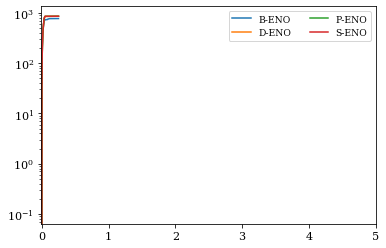

In [25]:
violation_density = deno_total_downtime.cumsum() + deno_total_overflow.cumsum()
violation_density[RANGE:] = violation_density[RANGE:] - violation_density[:-RANGE]
plt.plot(violation_density[0:VIEW]/10)

violation_density = peno_total_downtime.cumsum() + peno_total_overflow.cumsum()
violation_density[RANGE:] = violation_density[RANGE:] - violation_density[:-RANGE]
plt.plot(violation_density[0:VIEW]/10)

violation_density = seno_total_downtime.cumsum() + seno_total_overflow.cumsum()
violation_density[RANGE:] = violation_density[RANGE:] - violation_density[:-RANGE]
plt.plot(violation_density[0:VIEW]/10)

violation_density = aeno_total_downtime.cumsum() + aeno_total_overflow.cumsum()
violation_density[RANGE:] = violation_density[RANGE:] - violation_density[:-RANGE]
plt.plot(violation_density[0:VIEW]/10)

# plt.ylim([0,50])
plt.yscale('log')
plt.xticks(np.arange(0,VIEW,(4*7*24*52)),np.arange(0,VIEW/(4*7*24*52)).astype(int) )
label = ['B-ENO','D-ENO','P-ENO','S-ENO','A-ENO']
plt.legend(label,ncol = 2)

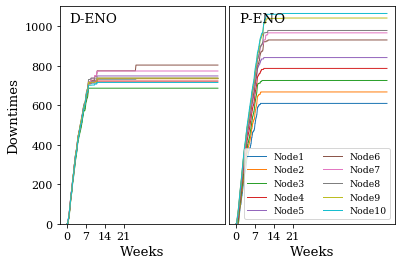

In [26]:
fig = plt.figure()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.02, hspace=None)

ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

ax0.set_ylim([0,1100])
ax0.set_xlabel('Weeks')
ax0.set_xticks(np.arange(0,24*7*26,24*7*26/4))
ax0.set_xticklabels(np.arange(0,26,7).astype(int));
ax0.set_title('D-ENO', x = 0.2, y=0.9)
ax0.set_ylabel('Downtimes')

ax1.set_ylim([0,1100])
ax1.set_xlabel('Weeks')
ax1.set_xticks(np.arange(0,24*7*26,24*7*26/4))
ax1.set_xticklabels(np.arange(0,26,7).astype(int));
ax1.set_title('P-ENO', x = 0.2, y=0.9)
ax1.set_yticklabels([])
ax1.set_yticks([],[])

for i in range(NO_OF_NODES):
    ax0.plot(deno_downtime_occur[i,0:].cumsum(), alpha=1.0, linewidth=1.0)
    ax1.plot(peno_downtime_occur[i,0:].cumsum(), alpha=1.0, linewidth=1.0)

label = ["Node"+str(i+1) for i in range(10)]
ax1.legend(label,loc = 'lower right',ncol=2)
plt.savefig("unsafe.png",bbox_inches='tight')
plt.savefig("unsafe.pdf",bbox_inches='tight')

In [27]:
batt = seno[:,:,0]
downtime_occur = (batt < 0.0055).astype(int)
overflow_occur = (batt == 1).astype(int)

# OVERALL DOWNTIME OF SYSTEM
seno_total_downtime = downtime_occur.sum(axis=0)
seno_total_overflow = overflow_occur.sum(axis=0)


In [28]:
batt = aeno[:,:,0]
downtime_occur = (batt < 0.0055).astype(int)
overflow_occur = (batt == 1).astype(int)

# OVERALL DOWNTIME OF SYSTEM
aeno_total_downtime = downtime_occur.sum(axis=0)
aeno_total_overflow = overflow_occur.sum(axis=0)

In [29]:
dummy = np.zeros_like(beno_total_downtime)
dummy[:deno_total_downtime.shape[0]] = deno_total_downtime
deno_total_downtime = dummy

dummy = np.zeros_like(beno_total_downtime)
dummy[:peno_total_downtime.shape[0]] = peno_total_downtime
peno_total_downtime = dummy

dummy = np.zeros_like(beno_total_downtime)
dummy[:seno_total_downtime.shape[0]] = seno_total_downtime
seno_total_downtime = dummy

dummy = np.zeros_like(beno_total_downtime)
dummy[:aeno_total_downtime.shape[0]] = aeno_total_downtime
aeno_total_downtime = dummy

dummy = np.zeros_like(beno_total_overflow)
dummy[:deno_total_overflow.shape[0]] = deno_total_overflow
deno_total_overflow = dummy

dummy = np.zeros_like(beno_total_overflow)
dummy[:peno_total_overflow.shape[0]] = peno_total_overflow
peno_total_overflow = dummy

dummy = np.zeros_like(beno_total_overflow)
dummy[:seno_total_overflow.shape[0]] = seno_total_overflow
seno_total_overflow = dummy

dummy = np.zeros_like(beno_total_overflow)
dummy[:aeno_total_overflow.shape[0]] = aeno_total_overflow
aeno_total_overflow = dummy

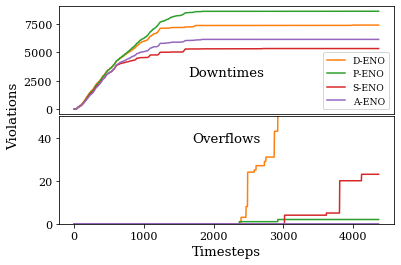

In [30]:
fig = plt.figure()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.02)

ax = fig.add_subplot(211)
# ax.plot(beno_total_downtime.cumsum())
ax.plot(deno_total_downtime.cumsum()[0:26*7*24],c=cmap(2))
ax.plot(peno_total_downtime.cumsum()[0:26*7*24],c=cmap(4))
ax.plot(seno_total_downtime.cumsum()[0:26*7*24],c=cmap(6))
ax.plot(aeno_total_downtime.cumsum()[0:26*7*24],c=cmap(8))
ax.xaxis.set_ticks_position('none')
# ax.set_xscale('log')

ax.legend(['D-ENO','P-ENO','S-ENO', 'A-ENO'])


fig.text(0.005, 0.5, 'Violations', va='center', rotation='vertical', fontsize='small')
ax.set_xlabel('Timesteps')

ax1 = fig.add_subplot(212)
# ax1.plot(beno_total_overflow.cumsum())
ax1.plot(deno_total_overflow.cumsum()[0:26*7*24],c=cmap(2))
ax1.plot(peno_total_overflow.cumsum()[0:26*7*24],c=cmap(4))
ax1.plot(seno_total_overflow.cumsum()[0:26*7*24],c=cmap(6))
ax1.plot(aeno_total_overflow.cumsum()[0:26*7*24],c=cmap(8))
# ax1.set_xscale('log')

# ax1.set_ylabel('Cumulative Downtimes')
ax1.set_xlabel('Timesteps')
ax1.set_ylim([0,50])
ax.set_title('Downtimes', x = 0.5, y=0.3)
ax1.set_title('Overflows', x = 0.5, y=0.7)

# fig.tight_layout()
plt.savefig("disasters.png",bbox_inches='tight')
plt.savefig("disasters.pdf",bbox_inches='tight')

In [31]:
# fig = plt.figure()
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.02)

# ax = fig.add_subplot(211)
# ax.plot(beno_total_downtime.cumsum())
# ax.plot(deno_total_downtime.cumsum())
# ax.plot(peno_total_downtime.cumsum())
# ax.plot(seno_total_downtime.cumsum())
# ax.plot(aeno_total_downtime.cumsum())
# ax.xaxis.set_ticks_position('none')
# ax.set_xscale('log')

# ax.legend(['B-ENO','D-ENO','P-ENO','S-ENO', 'A-ENO'])


# fig.text(0.005, 0.5, 'Cumulative Violations', va='center', rotation='vertical', fontsize='small')
# ax.set_xlabel('Timesteps')

# ax1 = fig.add_subplot(212)
# ax1.plot(beno_total_overflow.cumsum())
# ax1.plot(deno_total_overflow.cumsum())
# ax1.plot(peno_total_overflow.cumsum())
# ax1.plot(seno_total_overflow.cumsum())
# ax1.plot(aeno_total_overflow.cumsum())
# ax1.set_xscale('log')

# # ax1.set_ylabel('Cumulative Downtimes')
# ax1.set_xlabel('Timesteps')

# ax.set_title('Downtimes', x = 0.5, y=0.7)
# ax1.set_title('Overflows', x = 0.5, y=0.7)

# # fig.tight_layout()
# plt.savefig("disasters.png",bbox_inches='tight')
# plt.savefig("disasters.pdf",bbox_inches='tight')

In [32]:
dt = beno_total_downtime.sum(),deno_total_downtime.sum(),peno_total_downtime.sum(),seno_total_downtime.sum(),aeno_total_downtime.sum()

In [33]:
dt

(17035, 7390, 8607, 5327, 6133)

In [34]:
np.array(dt)/24

array([709.79166667, 307.91666667, 358.625     , 221.95833333,
       255.54166667])

In [35]:
ot = beno_total_overflow.sum(),deno_total_overflow.sum(),peno_total_overflow.sum(),seno_total_overflow.sum(),aeno_total_overflow.sum()

In [36]:
ot

(457, 355, 2, 417, 0)

In [37]:
np.array(ot)/365

array([1.25205479, 0.97260274, 0.00547945, 1.14246575, 0.        ])

In [38]:
20*365

7300

In [39]:
(np.array(dt) + np.array(ot))/24

array([728.83333333, 322.70833333, 358.70833333, 239.33333333,
       255.54166667])

In [40]:
# dummy = np.zeros_like(beno_total_overflow)
# dummy[:deno_total_overflow.shape[0]] = deno_total_overflow
# deno_total_overflow = dummy

# dummy = np.zeros_like(beno_total_overflow)
# dummy[:peno_total_overflow.shape[0]] = peno_total_overflow
# peno_total_overflow = dummy

# dummy = np.zeros_like(beno_total_overflow)
# dummy[:seno_total_overflow.shape[0]] = seno_total_overflow
# seno_total_overflow = dummy

# dummy = np.zeros_like(beno_total_overflow)
# dummy[:aeno_total_overflow.shape[0]] = aeno_total_overflow
# aeno_total_overflow = dummy



# plt.plot(beno_total_overflow.cumsum())
# plt.plot(deno_total_overflow.cumsum())
# plt.plot(peno_total_overflow.cumsum())
# plt.plot(seno_total_overflow.cumsum())
# plt.plot(aeno_total_overflow.cumsum())

# plt.ylabel('Cumulative Overflows')
# plt.xlabel('Timesteps')
# plt.xscale('log')
# plt.legend(['B-ENO','D-ENO','P-ENO','S-ENO', 'A-ENO'])

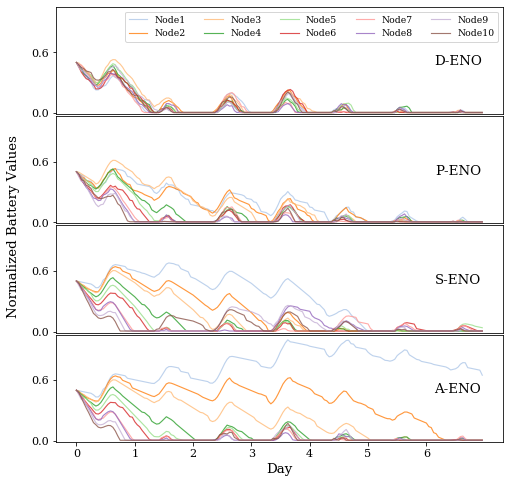

In [41]:
fig, ax = plt.subplots(4, 1, sharex='col', sharey='row',figsize=(8,8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.02)

eno = ['D-ENO','P-ENO','S-ENO','A-ENO']
for i in range(4):
        ax[i].set_ylim([-0.01,1.05])    
        ax[i].yaxis.set_major_locator(plt.MaxNLocator(2))
        ax[i].set_title(eno[i], x = 0.9, y=0.4)

ax[0].xaxis.set_ticks_position('none')
ax[1].xaxis.set_ticks_position('none')
ax[2].xaxis.set_ticks_position('none')
ax[3].set_xticks(np.arange(0,24*7,24))
ax[3].set_xticklabels(np.arange(0,7))
ax[3].set_xlabel('Day')
fig.text(0.04, 0.5, 'Normalized Battery Values', va='center', rotation='vertical', fontsize='small')


for i in range(NO_OF_NODES):
    ax[0].plot(deno[i,0:24*7,0], alpha=0.8, linewidth=1.15, c=cmap(i+1))
    ax[1].plot(peno[i,0:24*7,0], alpha=0.8, linewidth=1.15, c=cmap(i+1))
    ax[2].plot(seno[i,0:24*7,0], alpha=0.8, linewidth=1.15, c=cmap(i+1))
    ax[3].plot(aeno[i,0:24*7,0], alpha=0.8, linewidth=1.15, c=cmap(i+1))


# ax.plot(beno_total_downtime.cumsum())
# ax.plot(deno_total_downtime.cumsum())
# ax.plot(ceno_total_downtime.cumsum())
# ax.plot(seno_total_downtime.cumsum())
# ax.set_xscale('log')

# ax.set_ylabel('Cumulative Downtimes')
# ax.set_xlabel('Timesteps')

label = ["Node"+str(i+1) for i in range(10)]
ax[0].legend(label,loc = 'upper right',ncol=5)
# fig.tight_layout()
plt.savefig("init_Batts.png",bbox_inches='tight')
plt.savefig("init_Batts.pdf",bbox_inches='tight')

In [42]:
# plt.figure(figsize=(9,3))
# for i in range(NO_OF_NODES):
#     plt.plot(deno[i,0:24*7,0], alpha=0.8, linewidth=1.0)
# plt.plot(deno[0,0:24*7,2], 'k', alpha=0.1)

In [43]:
# plt.figure(figsize=(9,3))
# for i in range(NO_OF_NODES):
#     plt.plot(ceno[i,0:24*7,0], alpha=0.8, linewidth=1.0)
# plt.plot(deno[0,0:24*7,2], 'k', alpha=0.1)

In [44]:
# plt.figure(figsize=(9,3))
# for i in range(NO_OF_NODES):
#     plt.plot(seno[i,0:24*7,0], alpha=0.8, linewidth=1.0)
# plt.plot(deno[0,0:24*7,2], 'k', alpha=0.1)

In [45]:
# plt.figure(figsize=(39,3))
# for i in range(NO_OF_NODES):
#     plt.plot(deno[i,0:24*280,-1], alpha=0.8, linewidth=1.0)

In [46]:
# plt.figure(figsize=(39,3))
# for i in range(NO_OF_NODES):
#     plt.plot(ceno[i,0:24*280,-1], alpha=0.8, linewidth=1.0)

In [47]:
# plt.figure(figsize=(39,3))
# for i in range(NO_OF_NODES):
#     plt.plot(seno[i,0:24*280,-1], alpha=0.8, linewidth=1.0)

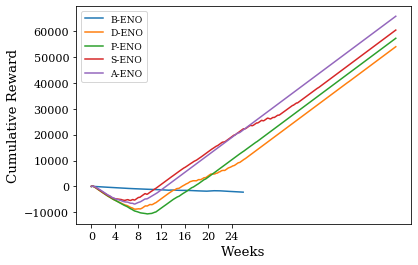

In [48]:
deno_all_node_reward = deno[:,:,-1].sum(axis=0)
peno_all_node_reward = peno[:,:,-1].sum(axis=0)
seno_all_node_reward = seno[:,:,-1].sum(axis=0)
aeno_all_node_reward = aeno[:,:,-1].sum(axis=0)


fig = plt.figure()
plt.plot(beno[0:26*7*24,-1].cumsum())
plt.plot(deno_all_node_reward.cumsum())
plt.plot(peno_all_node_reward.cumsum())
plt.plot(seno_all_node_reward.cumsum())
plt.plot(aeno_all_node_reward.cumsum())

plt.legend(['B-ENO','D-ENO','P-ENO','S-ENO', 'A-ENO'])

plt.xlabel('Weeks')
plt.xticks(np.arange(0,24*26*7,24*28),np.arange(0,26,4).astype(int));
plt.ylabel('Cumulative Reward')
plt.savefig("cum_reward.png",bbox_inches='tight')
plt.savefig("cum_reward.pdf",bbox_inches='tight')

In [49]:
beno_test = np.array([0,2, 0, 1,3,0,0,1,0,0,5,0,0,0, 3,7,0, 0,1]).cumsum()
deno_test = np.array([0,0,44,30,0,0,0,0,0,0,0,0,0,0,12,0,0,15,0]).cumsum()
peno_test = np.array([2,0, 0, 0,0,0,0,0,0,0,0,0,0,0, 1,2,0, 0,0]).cumsum()
seno_test = np.array([0,0, 0, 0,0,0,0,0,0,0,0,0,0,0, 0,0,0, 0,0]).cumsum()
aeno_test = np.array([0,0, 0, 0,0,0,0,0,0,0,0,0,0,0, 0,0,0, 0,0]).cumsum()

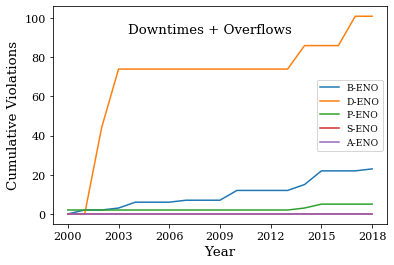

In [51]:
fig = plt.figure()
plt.plot(beno_test)
plt.plot(deno_test)
plt.plot(peno_test)
plt.plot(seno_test)
plt.plot(aeno_test)

plt.legend(['B-ENO','D-ENO','P-ENO','S-ENO', 'A-ENO'])
plt.xticks(np.arange(0,19,3),np.arange(2000,2019,3).astype(int))
plt.xlabel('Year')
plt.ylabel('Cumulative Violations')
fig.text(0.3, 0.8, 'Downtimes + Overflows', va='center',  fontsize='small')
plt.savefig("cum_viol.png",bbox_inches='tight')
plt.savefig("cum_viol.pdf",bbox_inches='tight')


In [52]:
DAY_LEN = 100

In [53]:
x = deno[:,0:DAY_LEN,:].reshape(-1,6)
np.cov(x[:,0],x[:,2])[0,0]

0.021782894101798362

In [54]:
x = peno[:,0:DAY_LEN,:].reshape(-1,6)
np.cov(x[:,0],x[:,2])[0,0]

0.025962647142922766

In [55]:
x = seno[:,0:DAY_LEN,:].reshape(-1,6)
np.cov(x[:,0],x[:,2])[0,0]

0.03872793987313276

In [56]:
x = aeno[:,0:DAY_LEN,:].reshape(-1,6)
np.cov(x[:,0],x[:,2])[0,0]

0.060606636137596634

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: Degrees of freedom <= 0 for slice
  """
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2451: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: Degrees of freedom <= 0 for slice
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: Degrees of freedom <= 0 for sli

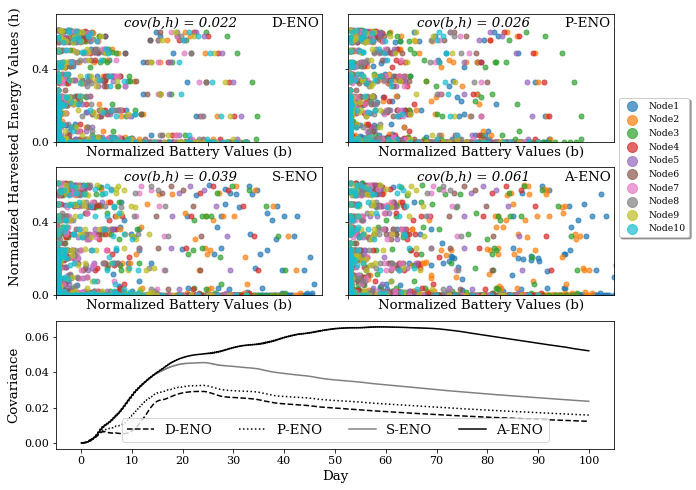

In [57]:
DAY_LEN0 = 100

states = deno[:,0:24*DAY_LEN0,0:4]
day_wise = np.einsum('nde->dne',states).reshape(-1,4)
dcov = [np.cov(day_wise[:x,0],day_wise[:x,3])[0,0] for x in range(DAY_LEN0*24)]

states = peno[:,0:24*DAY_LEN0,0:4]
day_wise = np.einsum('nde->dne',states).reshape(-1,4)
pcov = [np.cov(day_wise[:x,0],day_wise[:x,3])[0,0] for x in range(DAY_LEN0*24)]

states = seno[:,0:24*DAY_LEN0,0:4]
day_wise = np.einsum('nde->dne',states).reshape(-1,4)
scov = [np.cov(day_wise[:x,0],day_wise[:x,3])[0,0] for x in range(DAY_LEN0*24)]

states = aeno[:,0:24*DAY_LEN0,0:4]
day_wise = np.einsum('nde->dne',states).reshape(-1,4)
acov = [np.cov(day_wise[:x,0],day_wise[:x,3])[0,0] for x in range(DAY_LEN0*24)]


##############################################################################################
fig, ax = plt.subplots(3, 2, sharex='col', sharey='row',figsize=(10,8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.2)

DAY_LEN = 14*24
eno = [['D-ENO','P-ENO'],['S-ENO','A-ENO']]
cov = [[0.022,0.026],[0.039,0.061]]
for i in range(2):
    for j in range(2):
        ax[i][j].set_xlim([0,0.7])
        ax[i][j].set_ylim([0,0.7])
        ax[i][j].xaxis.set_major_locator(plt.MaxNLocator(2))
        ax[i][j].yaxis.set_major_locator(plt.MaxNLocator(2))
        ax[i][j].set_title(eno[i][j], x = 0.9, y=0.85)
        ax[i][j].set_xlabel('Normalized Battery Values (b)')
        ax[i][j].text(0.18,0.63,
                      'cov(b,h) = '+ str(cov[i][j]),
                      fontsize='small',
                     style='italic',)
        
sz = 100
alfa = 0.7
        
for i in range(NO_OF_NODES):

    ax[0][0].scatter(deno[i,0:DAY_LEN,0],
                    deno[i,0:DAY_LEN,2],
                    marker='.',
                    s = sz, 
                    alpha=alfa,)
    ax[0][1].scatter(peno[i,0:DAY_LEN,0],
                    peno[i,0:DAY_LEN,2],
                    marker='.',
                    s = sz, 
                    alpha=alfa,)    
    ax[1][0].scatter(seno[i,0:DAY_LEN,0],
                    seno[i,0:DAY_LEN,2],
                    marker='.',
                    s = sz, 
                    alpha=alfa,)
    ax[1][1].scatter(aeno[i,0:DAY_LEN,0],
                    aeno[i,0:DAY_LEN,2],
                    marker='.',
                    s = sz, 
                    alpha=alfa,)
    
label = ["Node"+str(i+1) for i in range(10)]
ax[0][0].legend(label,loc = 'center left',ncol=1,bbox_to_anchor=(2.1, -0.2),shadow=True, fancybox=True, markerscale=2)

DAY_LEN0 = 100
ax3 = plt.subplot(313)
ax3.margins(0.05)
ax3.plot(dcov,'k--')
ax3.plot(pcov,'k:')
ax3.plot(scov,'k',alpha=0.5)
ax3.plot(acov, 'k')
# plt.yscale('log')
ax3.set_xlabel('Day')
ax3.set_ylabel('Covariance')
ax3labels = ['D-ENO', 'P-ENO','S-ENO','A-ENO']
ax3.legend(ax3labels,ncol=4,labelspacing = 0.25, fontsize='small')
ax3.set_xticks(np.arange(0,(1+DAY_LEN0)*24,10*24))
ax3.set_xticklabels(np.arange(0,DAY_LEN0+1,10))

fig.text(0.06, 0.65, 'Normalized Harvested Energy Values (h)', va='center', rotation='vertical', fontsize='small')
plt.savefig("spread.png",bbox_inches='tight')
plt.savefig("spread.pdf",bbox_inches='tight')

In [58]:
np.array([.009, .012, .011, .04])/.009

array([1.        , 1.33333333, 1.22222222, 4.44444444])

In [59]:
694.96/324.13


2.144077993397711

In [60]:
7300/182


40.10989010989011

In [61]:
101/24


4.208333333333333

In [62]:
(5.5)%2

1.5

In [63]:
((np.arange(0,20)/3)%10)

array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
       1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ,
       3.33333333, 3.66666667, 4.        , 4.33333333, 4.66666667,
       5.        , 5.33333333, 5.66666667, 6.        , 6.33333333])